### <p style="text-align: right;"> &#9989; Nathan Kurt</p>

#### <p style="text-align: right;"> &#9989; Put your group member names here.</p>

# Day 18 In-Class: Weather Prediction

<img src="https://picturecorrect-wpengine.netdna-ssl.com/wp-content/uploads/2010/05/bad-weather2.jpg" width=300px>

## Goals for today's in-class assignment

* Apply linear regression or autoregression model to Weather data to make a prediction.

## Assignment instructions

Work with your group to complete this assignment. Instructions for submitting this assignment are at the end of the notebook. The assignment is due at the end of class.

**Important**: The culmination of this assignment is create the most accurate temperature prediction you can for the temperatures on Thanksgiving, November 22nd, along with an appealing visualization. You are welcome to work as a group to submit your best possible prediction!

____
# Forecasting Weather Trends in Lansing

## Background

In this activity you will extend your skills as a data scientist from understanding the past to predicting the future. Because of its impact on our daily lives and its potential [enormous consequences for the future of our civilization](https://www.nytimes.com/interactive/2016/08/20/sunday-review/climate-change-hot-future.html), we will use weather data.

There is an abundance of data on this subject available freely on the Internet. We'll load the data into this notebook using Pandas. The data you're using has been scraped from [Weather Underground](https://www.wunderground.com) using their API for querying their database (which you can find [here](https://www.wunderground.com/weather/api/d/docs) if you're curious). Once you load up the data, we will model it. The models we will use are very simple: looking at trends by assuming the data have some functional form (here, we assume it follows a polynomial).

You will also continue to build upon your experience using one of NumPy's built-in "black boxes" for finding trends in a set of numbers (temperature data in our case). That functionality is called __`polyfit`__ and, provided you send it the information it wants in the form it wants, it will return to you the "best" polynomial for the data. Roughly speaking, "best" means that none of the data are too far away from the fit line. As before, you will need to understand exactly what it returns. As always, use the Internet to find any additional information you might need. Try searching using terms like "polyfit python use". You will find a lot of [other people](http://stackoverflow.com/questions/18767523/fitting-data-with-numpy) doing similar things. 

Our goal for today is to predict the weather in Lansing for the next month or so using past data. Specifically, your goal is to predict the temperature on Thanksgiving (November 22nd). We will use the last ~4+ years of data to do this!

Let's get to it!

---
## Part 1 Loading and inspecting the data

You'll find a number of datasets on D2L for this assignment. The files that are called things like "2014_temperature_data.csv", which contain the temperature data for every day in that year (with the exception of 2018 for obvious reasons). When you load up the data, you should see values for the date and the following temperature values:

* meantempi -- the mean temperature recorded for that date
* mintempi -- the minimum temperature recorded for that date
* maxtempi -- the maximum temperature recorded for that date

Try loading up a dataset and make sure you understand the values.

In the event that you're itching for even more weather data, we've also provide the _all_ of the information provided by Weather Underground in the "20XX_weather_data.csv" files. We encourage you to load up at least one of those datasets and take a look at all of the information you _could_ model.

If you're interested in knowing how we scraped the data off of the web, talk to us after class!

**Also**, make some plots of the data so that you understand what you're looking at and what the general trends are from year to year.

In [1]:
# We'll load up some Python modules and set some parameters for making higher quality plots.
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
# uncomment the following line if you want to make higher quality plots than the default (PNG)
set_matplotlib_formats('pdf', 'svg') 
from pandas.plotting import lag_plot
import pandas as pd
import numpy as np
%matplotlib inline 
# You'll probably need to load some other modules as well

In [21]:
# Load up the data and make some plots of it to understand what some of the visual trends are
temp_file_2017 = pd.read_csv("2017_temperature_data.csv")
temp_file_2017.columns
temp_file_2017.head()

,Unnamed: 0,date,meantempi,mintempi,maxtempi,datenumber
0,0,2017-01-01,32,21,42,736330.0
1,1,2017-01-02,34,24,44,736331.0
2,2,2017-01-03,36,35,37,736332.0
3,3,2017-01-04,17,15,19,736333.0
4,4,2017-01-05,10,7,14,736334.0


In [9]:
temp_file_2018 = pd.read_csv("2018_temperature_data.csv")
temp_file_2018.head()

,Unnamed: 0,date,meantempi,mintempi,maxtempi,datenumber
0,0,2018-01-01,8,3,12,736695.0
1,1,2018-01-02,10,2,18,736696.0
2,2,2018-01-03,10,2,17,736697.0
3,3,2018-01-04,5,-5,14,736698.0
4,4,2018-01-05,-1,-8,6,736699.0


____

## Part 2: Modeling weather data with linear regression

Let's think about how to model the weather. As you certainly have realized, this is an incredibly difficult thing to do. But, what we will do here is to examine past data and use it to predict future trends. If we were looking at data over a fairly short time period (say January and February) and predicting March, we may only need to ask: how much is the temperature increasing or decreasing as we head into the early parts of spring? To do this, we could assume that there is a linear relationship with time, as in
$$ T(t) = \beta t + \gamma,$$

where $\beta$ and $\gamma$ can be obtained by looking at past data. But, you could argue: this model for the data is too simple, and we might instead try something like
$$ T(t) = \alpha t^2 + \beta t + \gamma,$$

which has some curvature to it - it is a "quadratic" function (or, a "parabola" if you prefer to think in terms of its graph). The quadratic is nice because the function has more structure in it and one more parameter that can help us capture details in the data better. In general, functions like this are called "polynomials", and we could also consider a cubic (by adding yet another term with $t^3$). Lucky for us, Python, and its wonderful library NumPy, knows a lot about how to match polynomials to data!

To do this, we use the library function "__polyfit__" from NumPy. All the gory details are [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html). This is a function someone else wrote for you - aren't you lucky! It is very common to grab library functions like this from the large Python ecosystem rather than doing everything yourself.

**Task:** Use `polyfit` to fit a quadratic function to one of the datasets that contains a full year of information (2014, 2015, 2016, or 2017) and plot the best fit line along with the data. You're free to try fitting whichever temperature value you want (i.e. min, max, or mean). Then, try fitting a cubic function as well (i.e. one that uses $t^3$!).

[-1.61722874e-03  6.11892548e-01  1.08330870e+01]


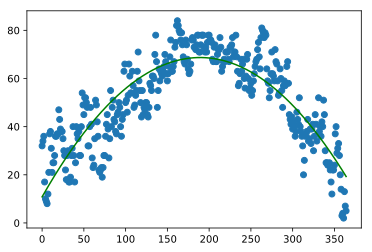

[-4.73213267e-06  9.66515700e-04  2.36215160e-01  2.21504043e+01]


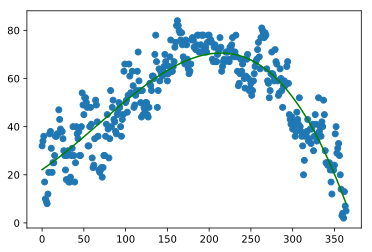

In [24]:
parameters_2017 = np.polyfit(temp_file_2017["Unnamed: 0"], temp_file_2017["meantempi"], 2)
print(parameters_2017)

quad = np.poly1d(parameters_2017)
expected_quad = quad(temp_file_2017["Unnamed: 0"])

plt.scatter(temp_file_2017["Unnamed: 0"], temp_file_2017["meantempi"], label = "data")
plt.plot(temp_file_2017["Unnamed: 0"], expected_quad, color = "green", label = "fit")
plt.show()

parameters_2017 = np.polyfit(temp_file_2017["Unnamed: 0"], temp_file_2017["meantempi"], 3)
print(parameters_2017)

quad = np.poly1d(parameters_2017)
expected_quad = quad(temp_file_2017["Unnamed: 0"])

plt.scatter(temp_file_2017["Unnamed: 0"], temp_file_2017["meantempi"], label = "data")
plt.plot(temp_file_2017["Unnamed: 0"], expected_quad, color = "green", label = "fit")

**Task**: Now try fitting the 2018 data and then overplot the best fit line. Also extend your the best fit line to predict 10 days worth of "future" data.

[-1.52501997e-03  6.18683962e-01  5.58903975e+00]


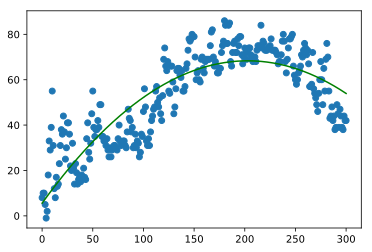

In [33]:
parameters_2018 = np.polyfit(temp_file_2018["Unnamed: 0"], temp_file_2018["meantempi"], 2)
print(parameters_2018)

quad_2018 = np.poly1d(parameters_2018)
expected_quad_2018 = quad_2018(temp_file_2018["Unnamed: 0"])

plt.scatter(temp_file_2018["Unnamed: 0"], temp_file_2018["meantempi"], label = "data")
plt.plot(temp_file_2018["Unnamed: 0"], expected_quad_2018, color = "green", label = "fit")

# dates = np.linspace(temp_file_2018["Unnamed: 0"].min(), temp_file_2018["Unnamed: 0"].max() + 10, 364)
# plt.scatter(temp_file_2018["Unnamed: 0"],temp_file_2018["meantempi"])
#plt.plot_date(dates,appr(dates))
#plt.plot_date(dates,linear_appr(dates))
# z = np.polyfit(temp_file_2018["meantempi"].iloc[0:299], temp_file_2018["meantempi"].iloc[1:300], 2)
# temp = z[0] * temp_file_2018["meantempi"].iloc[300] + z[1]
# print(temp)

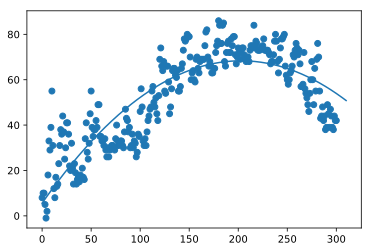

In [36]:
dates = np.linspace(temp_file_2018["Unnamed: 0"].min(), temp_file_2018["Unnamed: 0"].max() + 10, 364)
plt.scatter(temp_file_2018["Unnamed: 0"],temp_file_2018["meantempi"])
plt.plot(dates,quad_2018(dates))

##  Part 3 Looking for correlations in weather data

Next, we are going to revisit a very powerful idea, __correlations__ in data. When you have made plots so far, you plot the quantity of interest (e.g. temperature, position) against an obvious parameter, such as space $x$ or time $t$. The question we wish to answer now is: if we have two variables $T_1$ and $T_2$ that are both collected at various times $t$, are there relations between the values of $T_1$ and $T_2$ that hold for all $t$? That is, if we knew something about $T_1$, would be able to predict something about $T_2$? Such relationships would be incredibly useful! This is a deep subject, and we will only scratch the surface here by making a plot.

Notice that Matplotlib will accept two arrays of the same length and plot the second versus the first. So, suppose we plot $T_1$ versus $T_2$. What would that look like? If there are correlations, when $T_1$ goes up, $T_2$ is likely to go up; that is, they might appear to fall along a line. Let's try it!

**Task** Make a plot for the most recent year of complete data: 2017. You should **plot the max temperatures versus the min temperatures**. What's the best matplotlib function to use for this type of plot?

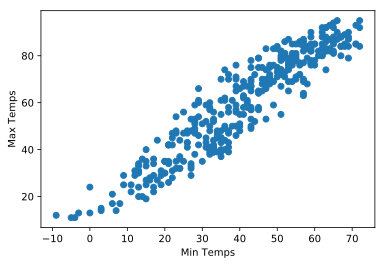

In [43]:
plt.scatter(temp_file_2017["mintempi"],temp_file_2017["maxtempi"])
#plt.plot_date(temp_file_2017["datenumber"],temp_file_2017["mintempi"], color="green")
plt.ylabel("Max Temps")
plt.xlabel("Min Temps")
plt.show()

The Python ecosystem has some amazing tools for performing computational modeling. We have already seen a few of these:
* NumPy
* Matplotlib
* Pandas
* Seaborn

Today, we will explore more about __Seaborn__. As always, if you want to learn more, you can go to its [website](http://seaborn.pydata.org/). There is a huge amount there, and we will only use a little of it today. As you progress through the semester, you can explore more of the things that Seaborn can help you with. Seaborn has a an impressive collection of special types of plots that are a bit different from the ordinary types you have learned earlier in the course (e.g. pie, histogram, line), and Seaborn's plots are well suited to data-science problems. 

Here is an simple example that uses the [jointplot](http://seaborn.pydata.org/generated/seaborn.jointplot.html) function in Seaborn to plot a correlation (for more information with what you can do with `jointplot` scroll through the documentation page in the link). **Pay special attention to the `kind` parameter, what happens if you don't include this?**

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


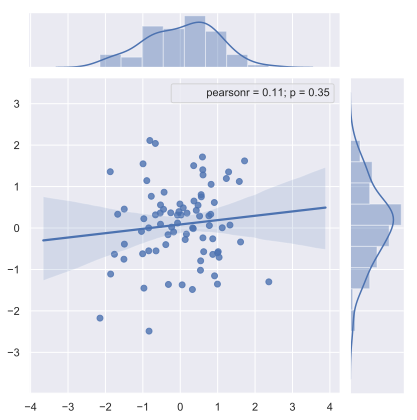

In [50]:
%matplotlib inline
import numpy as np
import seaborn as sns # import Seaborn; everyone calls it "sns" so you might as well do that too
import scipy.stats as stats
sns.set()
x_fake, y_fake = np.random.randn(2, 80)
j = sns.jointplot(x_fake, y_fake, kind = "reg")
j.annotate(stats.pearsonr)
plt.show()

Examine this plot carefully. **What types of information are immediately apparent to you? In what situation would you use plots of this type?**

*Put your answer here*

Sometimes you will have many features in your data (highs, lows, averages, highest ever, lowest ever; lead, titanium, cromium, and so on.) [Click here](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to see how Seaborn can be used to find correlations among several variables. These types of plots are [very much customizable](http://i.imgur.com/K3bUaas.png).

**Task:** Remake your correlation plot for the 2017 data using Seaborn's `jointplot` function. Does it look like Seaborn was able to find a correlation? Then, **make a plot for one of the other complete years: 2014, 2015, or 2016.** Is the correlation similar?

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


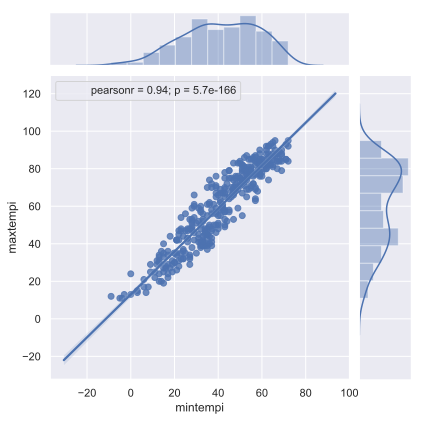

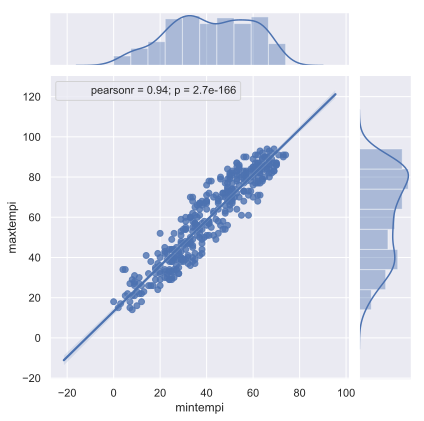

In [54]:
b = sns.jointplot(temp_file_2017["mintempi"],temp_file_2017["maxtempi"], kind = "reg")
b.annotate(stats.pearsonr)
plt.show()

temp_file_2016 = pd.read_csv("2016_temperature_data.csv")
b = sns.jointplot(temp_file_2016["mintempi"],temp_file_2016["maxtempi"], kind = "reg")
b.annotate(stats.pearsonr)
plt.show()


### Looking back at your plots

**Question**: Do the values you plotted appear to be correlated? Are their any points that appear to be anomalous?

Very strong correlation. not really any that seem very out there

## Part 4 Fitting weather data with autoregression

Intuitively, when we predict the tomorrow's temperature, we will usually use the information about today's temperature. This leads to a so-called **autoregression** model:
$$ T(t+1) = \beta T(t) + \gamma.$$
_An autoregressive model is one where a value from a time series is regressed on previous values from that same time series._
Now, let's make a plot visually checking the relationship between `maxtempi(t)` and `maxtempi(t + 1)`, which is the temperature of the day after the first one. Let's use the data from 2018. What type of plot should you choose? (Think back to the pre-class assignment)

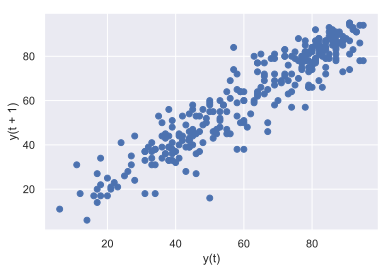

In [55]:
lag_plot(temp_file_2018["maxtempi"])

Does it show strong a linear relationship? If so, how can we estimate it using `polyfit`? 

In [61]:
z = np.polyfit(temp_file_2018["maxtempi"].iloc[0:299], temp_file_2018["maxtempi"].iloc[1:300], 1)
print(z)

[0.92646934 4.66558026]


Now, we can use the autoregressive model to make a prediction for October 29th, using all of the data we have up to October 28th (which is the last date in the dataset). What's your prediction?

In [60]:
z = np.polyfit(temp_file_2018["maxtempi"].iloc[0:299], temp_file_2018["maxtempi"].iloc[1:300], 1)
temp = z[0] * temp_file_2018["maxtempi"].iloc[300] + z[1]
print(temp)

47.28316969461794


Can we make a weather prediction 10 days beyond the end of the past data? (Hint: you may need to use loops)

In [65]:
n = temp_file_2018["maxtempi"].iloc[299]
points_to_plot = []

for i in range(10):
    
    predict = round(z[0] * n + z[1], 0)
    print(predict)
    points_to_plot.append(predict)
    n = predict



46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0


**Question**: Think back to your linear regression model and compare it to your autoregression model. Which model do you prefer? And why?

autoregression seems pretty cool! 

____
<h2 align=center><font color='red'>Challenge!!! How well can you predict the weather?</font></h2>

As a challenge, your group should try to produce an estimate for the **high** and **low** temperatures in Lansing on Thanksgiving (November 22nd). You can use any sort of model you prefer using what we've learned up to this point. The goal is to see how close your forecast end up being to the real values and produce a high quality plot that visualizes your prediction.

Make sure your visualize really conveys your point! Use as many [features](http://matplotlib.org/1.3.1/users/annotations_guide.html) as you can to make your result informative, intuitive, and visually appealing. Save your plot as `yourname_forecast.pdf` and put it in the D2L dropbox for today's activity.

If you run out of time to finalize your prediction in-class, **feel free to try finishing it off so that you can compare how close you end up getting to the real value!**
____

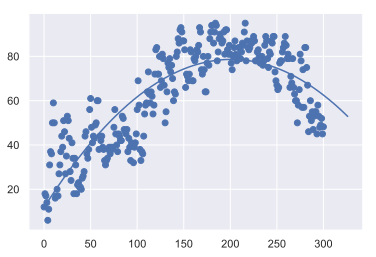

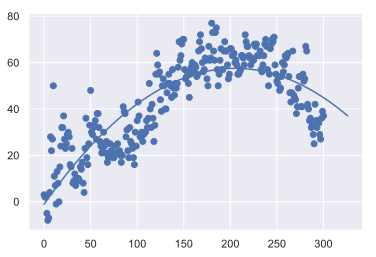

In [69]:
parameters_2018 = np.polyfit(temp_file_2018["Unnamed: 0"], temp_file_2018["maxtempi"], 2)


quad_2018 = np.poly1d(parameters_2018)

dates = np.linspace(temp_file_2018["Unnamed: 0"].min(), temp_file_2018["Unnamed: 0"].max() + 26, 364)
plt.scatter(temp_file_2018["Unnamed: 0"],temp_file_2018["maxtempi"])
plt.plot(dates,quad_2018(dates))
plt.show()

parameters_2018 = np.polyfit(temp_file_2018["Unnamed: 0"], temp_file_2018["mintempi"], 2)


quad_2018 = np.poly1d(parameters_2018)

dates = np.linspace(temp_file_2018["Unnamed: 0"].min(), temp_file_2018["Unnamed: 0"].max() + 26, 364)
plt.scatter(temp_file_2018["Unnamed: 0"],temp_file_2018["mintempi"])
plt.plot(dates,quad_2018(dates))
plt.show()


<img src="http://www.azquotes.com/picture-quotes/quote-prediction-is-very-difficult-especially-if-it-s-about-the-future-niels-bohr-3-7-0757.jpg" width=600px>

---
# Assignment wrap-up

Fille out the survey and then submit your notebook and your prediction plot!

In [70]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://goo.gl/forms/0i3Mc4WoeZEij6pJ3" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### You're done! Submit the notebook to D2L along with your forecast plot!